# Analyzing the provided spectrograms



In [1]:
import os 
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
# import librosa

In [2]:
base_dir = pathlib.Path("../../kaggle_data/hms")
# base_dir = pathlib.Path("../../data/hms")
# base_dir = pathlib.Path("/kaggle/input/hms-harmful-brain-activity-classification")

train_files_eegs = os.listdir(base_dir / "train_eegs")
train_files_specs = os.listdir(base_dir / "train_spectrograms")
os.listdir(base_dir)

['test_eegs',
 'test.csv',
 'train_eegs',
 'example_figures',
 'train.csv',
 'test_spectrograms',
 'sample_submission.csv',
 'train_spectrograms']

In [3]:
df_traincsv = pd.read_csv(f'{base_dir}/train.csv')
# train.sample(10)
df_traincsv.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [4]:
classes = df_traincsv.expert_consensus.unique()
classes

array(['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'], dtype=object)

In [5]:
# eeg_id = 1029863597
# eeg_sub_id = 15  # seizure

# eeg_id = 3988090520
# eeg_sub_id = 1  # seizure
# single_sub_eeg = df_traincsv.loc[(df_traincsv.eeg_id == eeg_id) & (df_traincsv.eeg_sub_id == eeg_sub_id)].iloc[0]

# Random eeg and sub id.
single_sub_eeg = df_traincsv.sample(1).iloc[0]

df_spec = pd.read_parquet(f'{base_dir}/train_spectrograms/{single_sub_eeg.spectrogram_id}.parquet')
print(df_spec.shape)
df_spec

(401, 401)


,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,90.750000,128.059998,134.259995,89.370003,117.970001,100.720001,63.320000,74.980003,63.660000,...,0.75,0.58,0.28,0.28,0.25,0.30,0.39,0.51,0.49,0.41
1,3,72.160004,68.029999,76.849998,112.790001,73.019997,90.529999,56.250000,93.949997,45.639999,...,0.32,0.29,0.39,0.32,0.36,0.34,0.29,0.36,0.28,0.26
2,5,36.410000,63.639999,64.110001,61.860001,62.189999,43.639999,28.530001,30.049999,25.530001,...,0.16,0.21,0.25,0.34,0.39,0.38,0.39,0.41,0.43,0.30
3,7,99.660004,113.870003,103.199997,96.589996,78.489998,54.599998,58.450001,47.240002,39.360001,...,0.13,0.18,0.28,0.33,0.29,0.34,0.26,0.30,0.38,0.37
4,9,77.459999,86.260002,128.470001,89.070000,102.449997,105.510002,95.199997,73.580002,80.120003,...,0.20,0.19,0.17,0.27,0.35,0.48,0.50,0.43,0.32,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,793,153.250000,187.520004,207.770004,89.349998,91.029999,90.330002,40.310001,59.099998,25.830000,...,2.09,2.69,2.10,3.46,4.04,4.42,4.73,3.54,2.62,4.06
397,795,110.150002,117.309998,130.610001,89.110001,58.400002,53.160000,50.419998,40.779999,29.559999,...,2.19,1.66,1.73,1.76,2.90,2.58,3.57,3.38,4.15,2.32
398,797,46.160000,53.049999,31.629999,23.889999,24.719999,22.219999,26.740000,28.190001,25.459999,...,2.21,0.98,0.93,1.16,1.82,1.88,1.82,2.04,1.36,1.16
399,799,27.770000,32.910000,40.500000,23.799999,24.160000,20.420000,23.250000,27.049999,21.250000,...,1.41,2.37,1.63,1.42,1.40,1.27,1.23,1.58,1.41,1.68


In [18]:
# Columns for frquencies above 8 Hz (to remove some artifacts)
# 62 columns
print(df_spec.columns[39:101])
print(df_spec.columns[139:201])
# print(df_spec.columns[239:301])
# print(df_spec.columns[339:401])

Index(['LL_8.01', 'LL_8.2', 'LL_8.4', 'LL_8.59', 'LL_8.79', 'LL_8.98',
       'LL_9.18', 'LL_9.38', 'LL_9.57', 'LL_9.77', 'LL_9.96', 'LL_10.16',
       'LL_10.35', 'LL_10.55', 'LL_10.74', 'LL_10.94', 'LL_11.13', 'LL_11.33',
       'LL_11.52', 'LL_11.72', 'LL_11.91', 'LL_12.11', 'LL_12.3', 'LL_12.5',
       'LL_12.7', 'LL_12.89', 'LL_13.09', 'LL_13.28', 'LL_13.48', 'LL_13.67',
       'LL_13.87', 'LL_14.06', 'LL_14.26', 'LL_14.45', 'LL_14.65', 'LL_14.84',
       'LL_15.04', 'LL_15.23', 'LL_15.43', 'LL_15.63', 'LL_15.82', 'LL_16.02',
       'LL_16.21', 'LL_16.41', 'LL_16.6', 'LL_16.8', 'LL_16.99', 'LL_17.19',
       'LL_17.38', 'LL_17.58', 'LL_17.77', 'LL_17.97', 'LL_18.16', 'LL_18.36',
       'LL_18.55', 'LL_18.75', 'LL_18.95', 'LL_19.14', 'LL_19.34', 'LL_19.53',
       'LL_19.73', 'LL_19.92'],
      dtype='object')
Index(['RL_8.01', 'RL_8.2', 'RL_8.4', 'RL_8.59', 'RL_8.79', 'RL_8.98',
       'RL_9.18', 'RL_9.38', 'RL_9.57', 'RL_9.77', 'RL_9.96', 'RL_10.16',
       'RL_10.35', 'RL_10.55'

In [6]:
single_sub_eeg

eeg_id                              2935927150
eeg_sub_id                                   0
eeg_label_offset_seconds                   0.0
spectrogram_id                       210714858
spectrogram_sub_id                           0
spectrogram_label_offset_seconds           0.0
label_id                            2760564372
patient_id                               19083
expert_consensus                           LPD
seizure_vote                                 0
lpd_vote                                     8
gpd_vote                                     0
lrda_vote                                    0
grda_vote                                    0
other_vote                                   3
Name: 11085, dtype: object

In [7]:
df_traincsv.loc[df_traincsv.eeg_id == 3988090520]

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
106049,3988090520,0,0.0,2127737134,0,0.0,1776227382,39994,Seizure,3,0,0,0,0,0
106050,3988090520,1,6.0,2127737134,1,6.0,579960926,39994,Seizure,3,0,0,0,0,0
106051,3988090520,2,8.0,2127737134,2,8.0,3241583494,39994,Seizure,3,0,0,0,0,0
106052,3988090520,3,18.0,2127737134,3,18.0,675726519,39994,Seizure,3,0,0,0,0,0
106053,3988090520,4,28.0,2127737134,4,28.0,458743039,39994,Seizure,3,0,0,0,0,0
106054,3988090520,5,32.0,2127737134,5,32.0,3111518914,39994,Seizure,3,0,0,0,0,0
106055,3988090520,6,34.0,2127737134,6,34.0,2970130228,39994,Seizure,3,0,0,0,0,0


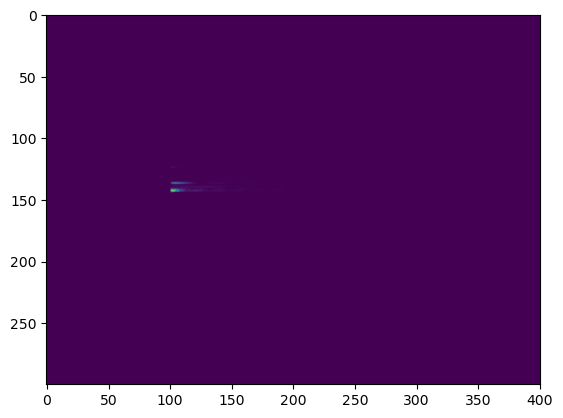

In [8]:
spec_offset = int( single_sub_eeg.spectrogram_label_offset_seconds )
spectrogram = df_spec.loc[(df_spec.time>=spec_offset) & (df_spec.time<spec_offset+600)]
plt.imshow(spectrogram)

How many columns of each kind?

In [9]:
li = np.array([])
for col in df_spec.columns:
    li = np.concatenate([li,[col[0:2]]])
np.unique(li, return_counts=True)

(array(['LL', 'LP', 'RL', 'RP', 'ti'], dtype='<U32'),
 array([100, 100, 100, 100,   1]))

Always the same frequencies?

Yes, counts for all frequencies is 11138 in each group.

In [98]:
# Working with a sub sample of files, change it for the complete dataset.
# for file in train_files_specs:

# frequencies = {
#     'LL' : np.array([]),
#     'LP' : np.array([]),
#     'RL' : np.array([]),
#     'RP' : np.array([])
# }
# # for file in train_files_specs:
# for file in train_files_specs[0:1000]:
#     df_spec = pd.read_parquet(f'{base_dir}/train_spectrograms/{file}')
#     columns = df_spec.columns[1:]
#     for col in columns:
#         desc = col[0:2]
#         freq = float(col[3:])
#         frequencies[desc] = np.concatenate([frequencies[desc], [freq]])

# for tt in ['LL', 'LP', 'RL', 'RP']:
#     val, counts = np.unique(frequencies['LL'], return_counts=True)
#     print(np.unique(counts))   

## Finding NaN's in spectrograms

In [6]:
df = pd.read_parquet('../data/00_single_spectrograms_originals.parquet')
columns = df.columns
print(df.shape)
df.head()

(4279506, 402)


,spectrogram_id,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,399182714,1,212.539993,375.029999,408.130005,347.369995,273.859985,135.289993,96.489998,82.160004,...,0.65,0.65,0.51,0.58,0.48,0.52,0.52,0.58,0.68,0.71
1,399182714,3,121.190002,205.570007,174.610001,192.529999,144.130005,76.650002,70.220001,65.050003,...,0.66,0.49,0.56,0.46,0.41,0.44,0.44,0.47,0.45,0.48
2,399182714,5,265.070007,373.109985,396.140015,369.790009,323.269989,226.000000,178.229996,174.490005,...,0.88,1.05,0.94,0.90,0.66,0.81,0.53,0.54,0.62,0.41
3,399182714,7,268.450012,287.470001,364.239990,338.390015,252.169998,278.339996,208.979996,159.399994,...,0.71,0.77,0.84,0.78,0.70,0.67,0.58,0.62,0.62,0.48
4,399182714,9,137.570007,128.470001,119.339996,135.380005,62.990002,83.089996,79.650002,61.110001,...,0.45,0.43,0.35,0.33,0.38,0.39,0.41,0.59,0.57,0.58


In [29]:
item = df_traincsv.iloc[33]
item

eeg_id                              2529955608
eeg_sub_id                                   1
eeg_label_offset_seconds                  28.0
spectrogram_id                         1219001
spectrogram_sub_id                           5
spectrogram_label_offset_seconds         218.0
label_id                            3801468573
patient_id                               23435
expert_consensus                       Seizure
seizure_vote                                 3
lpd_vote                                     0
gpd_vote                                     2
lrda_vote                                    0
grda_vote                                    0
other_vote                                   0
Name: 33, dtype: object

In [17]:
# Spectrograms with NaN's
idxs = (pd.isna(df)).any(axis=1)
specs_with_nan = df[idxs]['spectrogram_id'].unique()
specs_with_nan.shape

(969,)

In [9]:
# Spectrograms where all values are NaN.
specs_with_all_nans = np.array([], dtype=int)
for spec_id in specs_with_nan:
    sub_spec = df.loc[df.spectrogram_id == spec_id][columns[2:]]
    if pd.isna(sub_spec).all(axis=None):
        specs_with_all_nans = np.append(specs_with_all_nans, spec_id)

specs_with_all_nans


array([], dtype=int64)

<div class="alert alert-block alert-info"> <b>NOTE:</b> There are no spectrograms where everything is NaN.</div>

In [18]:
# Indices in df_traincsv where sub spectrogram has some NaN values.
idxs_sub_specs_with_nans = np.array([], dtype=int)
for spec_id in specs_with_nan:
    items = df_traincsv.loc[df_traincsv.spectrogram_id == spec_id]
    for idx in items.index:
        item = df_traincsv.iloc[idx]
        sub_spec = df.loc[(df.spectrogram_id == item.spectrogram_id)&
                          (df.time >= item.spectrogram_label_offset_seconds)&
                          (df.time < (item.spectrogram_label_offset_seconds + 600))][columns[2:]]
        if pd.isna(sub_spec).any(axis=None):
            idxs_sub_specs_with_nans = np.append(idxs_sub_specs_with_nans, idx)

idxs_sub_specs_with_nans

array([ 21333,  21334,  21335, ..., 105923, 105924, 105925])

<div class="alert alert-block alert-info"> <b>NOTE:</b> There are sub eeg's with NaN's in the corresponding sub spectrogram.</div>

In [19]:
len(idxs_sub_specs_with_nans)

7743

In [24]:
np.save('../data/idxs_sub_specs_with_nans.npy', idxs_sub_specs_with_nans)

In [21]:
df_traincsv.iloc[idxs_sub_specs_with_nans]

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
21333,1628527925,0,0.0,415275410,0,0.0,2630954756,44834,GRDA,0,0,0,0,2,0
21334,1906541639,0,0.0,415275410,1,262.0,187985206,44834,GRDA,0,0,0,0,11,4
21335,1906541639,1,2.0,415275410,2,264.0,3659759247,44834,GRDA,0,0,0,0,11,4
21336,1906541639,2,4.0,415275410,3,266.0,4275917827,44834,GRDA,0,0,0,0,11,4
21337,1906541639,3,6.0,415275410,4,268.0,1558718667,44834,GRDA,0,0,0,0,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105921,177234090,2,70.0,2125601164,2,70.0,53423443,56329,Other,0,0,2,0,0,13
105922,177234090,3,82.0,2125601164,3,82.0,172011294,56329,Other,0,0,2,0,0,13
105923,177234090,4,84.0,2125601164,4,84.0,1486426744,56329,Other,0,0,2,0,0,13
105924,177234090,5,90.0,2125601164,5,90.0,1740308063,56329,Other,0,0,2,0,0,13


In [28]:
# How to use these indices:
df_traincsv.index.difference(idxs_sub_specs_with_nans)

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       106790, 106791, 106792, 106793, 106794, 106795, 106796, 106797, 106798,
       106799],
      dtype='int64', length=99057)